In [1]:
import numpy as np
import pandas as pd

In [99]:
df = pd.read_json("data.json")

In [100]:
df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,"[{u'event_id': 527017, u'cost': 25.0, u'availa...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,"[{u'event_id': 786878, u'cost': 35.0, u'availa...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,"[{u'event_id': 787337, u'cost': 93.51, u'avail...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,"[{u'event_id': 885645, u'cost': 25.0, u'availa...",889,1283870102,3,,None,NaN,NaN,None,None
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,"[{u'event_id': 1114349, u'cost': 150.0, u'avai...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA


In [101]:
def label(x):
    if x.startswith("fraud"):
        return True
    else:
        return False
    

In [102]:
df["label"] = df["acct_type"].apply(label)

In [103]:
df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,label
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,True
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC,False
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA,False
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,889,1283870102,3,,None,NaN,NaN,None,None,False
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA,False


In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

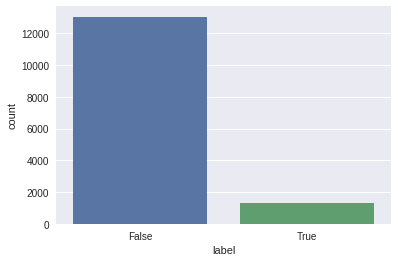

In [75]:
sns.countplot(df["label"])

In [104]:
df["label"].value_counts()

False    13044
True      1293
Name: label, dtype: int64

In [77]:
columnsIwant = [u'org_facebook', u'org_name', u'org_twitter', u'payee_name',
       u'payout_type', u'previous_payouts', u'sale_duration',
       u'sale_duration2', u'show_map', u'ticket_types']

In [78]:
d = df[columnsIwant]

In [79]:
d.head()

,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types
0,0.0,Party Starz Ent & Diverse Int'l Group,0.0,,,[],29.0,33,1,"[{u'event_id': 527017, u'cost': 25.0, u'availa..."
1,0.0,RUF at Winthrop University,12.0,RUF,CHECK,"[{u'name': u'RUF', u'created': u'2010-10-01 01...",28.0,28,0,"[{u'event_id': 786878, u'cost': 35.0, u'availa..."
2,0.0,University Preparation School in collaboration...,0.0,University Preparation School,CHECK,"[{u'name': u'Danielle Severn', u'created': u'2...",54.0,54,0,"[{u'event_id': 787337, u'cost': 93.51, u'avail..."
3,0.0,,0.0,,ACH,"[{u'name': u'', u'created': u'2010-11-09 01:10...",0.0,0,0,"[{u'event_id': 885645, u'cost': 25.0, u'availa..."
4,0.0,Arts & Business Council of Greater Boston,0.0,Arts and Business Council or Greater Boston,CHECK,[{u'name': u'Arts and Business Council or Grea...,63.0,63,0,"[{u'event_id': 1114349, u'cost': 150.0, u'avai..."


In [80]:
d["org_twitter"].nunique()

23

In [82]:
fraud = df[df["label"] == True]
not_fraud = df[df["label"] == False]

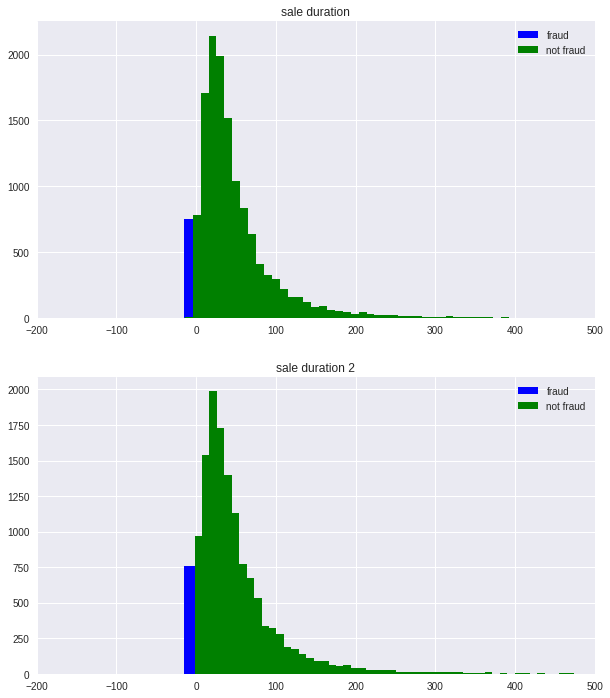

In [83]:
plt.figure(figsize = (10, 12))
plt.subplot(2, 1, 1)
fraud["sale_duration"].hist(bins = 100, color = "b", label = "fraud")
not_fraud["sale_duration"].hist(bins = 100, color = "g", label = "not fraud")
plt.xlim(-200, 500)
plt.title('sale duration')
plt.legend()

plt.subplot(2, 1, 2)
fraud["sale_duration2"].hist(bins = 100, color = "b", label = "fraud")
not_fraud["sale_duration2"].hist(bins = 100, color = "g", label = "not fraud")
plt.xlim(-200, 500)
plt.title('sale duration 2')
plt.legend()

In [92]:
pd.crosstab(df.org_facebook, df.label, margins=True).apply(lambda r: r/r.sum(), axis=1)

label,False,True,All
org_facebook,,,
0.0,0.427442,0.072558,0.5
3.0,0.500000,0.000000,0.5
4.0,0.500000,0.000000,0.5
5.0,0.500000,0.000000,0.5
6.0,0.500000,0.000000,0.5
7.0,0.500000,0.000000,0.5
8.0,0.493056,0.006944,0.5
9.0,0.498188,0.001812,0.5
10.0,0.488338,0.011662,0.5


In [93]:
pd.crosstab(df.org_twitter, df.label, margins=True).apply(lambda r: r/r.sum(), axis=1)

label,False,True,All
org_twitter,,,
0.0,0.433670,0.066330,0.5
2.0,0.500000,0.000000,0.5
3.0,0.500000,0.000000,0.5
4.0,0.500000,0.000000,0.5
5.0,0.500000,0.000000,0.5
6.0,0.500000,0.000000,0.5
7.0,0.497340,0.002660,0.5
8.0,0.500000,0.000000,0.5
9.0,0.500000,0.000000,0.5


In [94]:
pd.crosstab(df.payout_type, df.label, margins=True).apply(lambda r: r/r.sum(), axis=1)

label,False,True,All
payout_type,,,
,0.042596,0.457404,0.5
ACH,0.461935,0.038065,0.5
CHECK,0.495280,0.004720,0.5
All,0.454907,0.045093,0.5


In [87]:
df["payout_type"].unique()

array([u'', u'CHECK', u'ACH'], dtype=object)

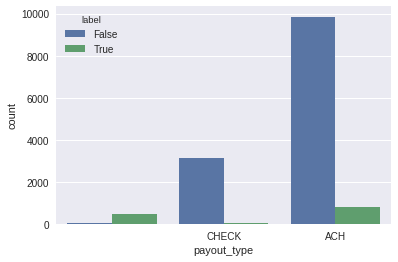

In [88]:
sns.countplot(df["payout_type"], hue=df["label"])

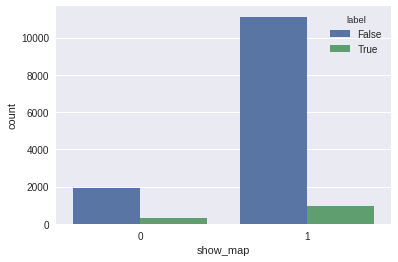

In [89]:
sns.countplot(df["show_map"], hue=df["label"])

In [105]:
df.iloc[3]["ticket_types"]

[{u'availability': 1,
  u'cost': 25.0,
  u'event_id': 885645,
  u'quantity_sold': 10,
  u'quantity_total': 5000},
 {u'availability': 1,
  u'cost': 15.0,
  u'event_id': 885645,
  u'quantity_sold': 23,
  u'quantity_total': 5000},
 {u'availability': 1,
  u'cost': 10.0,
  u'event_id': 885645,
  u'quantity_sold': 8,
  u'quantity_total': 5000},
 {u'availability': 1,
  u'cost': 5.0,
  u'event_id': 885645,
  u'quantity_sold': 12,
  u'quantity_total': 5000},
 {u'availability': 1,
  u'cost': 15.0,
  u'event_id': 885645,
  u'quantity_sold': 0,
  u'quantity_total': 5000},
 {u'availability': 1,
  u'cost': 12.0,
  u'event_id': 885645,
  u'quantity_sold': 5,
  u'quantity_total': 5000}]

In [106]:
def quantityTotal(x):
    lst = [i["quantity_total"] for i in x]
    return sum(lst)

In [107]:
df["quantity_total"] = df["ticket_types"].apply(quantityTotal)

In [117]:
df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,label,quantity_total,quantity_sold,availability,cost
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,True,920,0,3,625.00
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,US,32.776566,-79.930922,"The Charleston, SC area",SC,False,100,25,2,70.00
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,US,33.944201,-118.080419,Los Angeles County Office of Education,CA,False,48,48,1,93.51
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,None,NaN,NaN,None,None,False,30000,58,6,82.00
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,US,42.353848,-71.044276,Fish & Richardson,MA,False,264,39,8,814.00


In [109]:
def quantitySold(x):
    lst = [i["quantity_sold"] for i in x]
    return sum(lst)

In [110]:
df["quantity_sold"] = df["ticket_types"].apply(quantitySold)

In [111]:
def availability(x):
    lst = [i["availability"] for i in x]
    return sum(lst)

In [112]:
df["availability"] = df["ticket_types"].apply(availability)

In [113]:
def cost(x):
    lst = [i["cost"] for i in x]
    return sum(lst)

In [114]:
df["cost"] = df["ticket_types"].apply(cost)

In [115]:
df.shape

(14337, 49)

In [118]:
fraud = df[df["label"] == True]
not_fraud = df[df["label"] == False]

In [119]:
fraud.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,label,quantity_total,quantity_sold,availability,cost
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,True,920,0,3,625.0
26,fraudster,1299607200,870,11,US,USD,0.0,"<h1 class=""post"">Welcome</h1>\r\n<p> </p>\r\n<...",hotmail.com,1299171416,...,US,40.750228,-73.983714,The Setai,NY,True,35,2,2,500.0
51,fraudster_event,1329465600,536,6,US,USD,0.0,"<p><span style=""font-size: x-large;"">Okay ever...",cox.net,1317544696,...,US,32.702072,-117.085088,The Jacobs Center at Market Creek,CA,True,480,9,25,433.0
54,fraudster,1312761600,3081,11,,GBP,0.0,"<h3><strong><strong><span style=""font-family: ...",hotmail.co.uk,1311717051,...,,0.000000,0.000000,Olympia Exhibition Hall,,True,100,0,1,500.0
70,fraudster,1322895600,0,13,US,USD,0.0,,yahoo.com,1316795942,...,US,39.308752,-76.716174,,MD,True,50,0,1,30.0


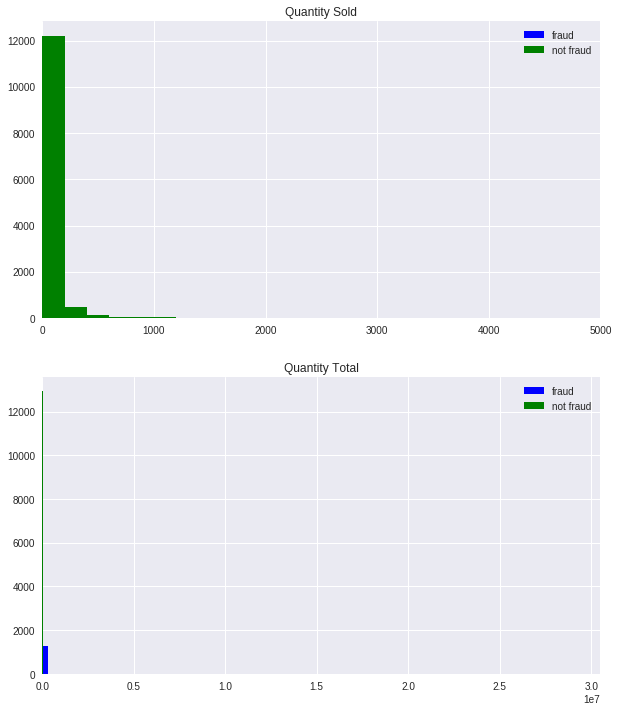

In [135]:
plt.figure(figsize = (10, 12))
plt.subplot(2, 1, 1)
fraud["quantity_sold"].hist(bins = 100, color = "b", label = "fraud")
not_fraud["quantity_sold"].hist(bins = 100, color = "g", label = "not fraud")
plt.xlim(0, 5000)
plt.title('Quantity Sold')
plt.legend()

plt.subplot(2, 1, 2)
fraud["quantity_total"].hist(bins = 100, color = "b", label = "fraud")
not_fraud["quantity_total"].hist(bins = 100, color = "g", label = "not fraud")
plt.xlim(df["quantity_total"].min(), df["quantity_total"].max())
plt.title('Quantity Total')
plt.legend()

In [127]:
fraud["quantity_total"].max()

30500000

In [128]:
not_fraud["quantity_total"].max()

2000000

In [129]:
fraud["quantity_total"].min()

0

In [130]:
not_fraud["quantity_total"].min()

0

In [131]:
fraud["quantity_total"].mean()

55398.492652745554

In [132]:
not_fraud["quantity_total"].mean()

2037.9508586323213

In [136]:
fraud["quantity_sold"].max()

415

In [146]:
fraud["cost"].mean()

525.5825599381282

In [147]:
fraud["availability"].mean()

1.7393658159319412

In [148]:
not_fraud["availability"].mean()

2.9310027598896045

In [149]:
not_fraud["cost"].mean()

385.26806961054524

In [137]:
not_fraud["quantity_sold"].max()

20020

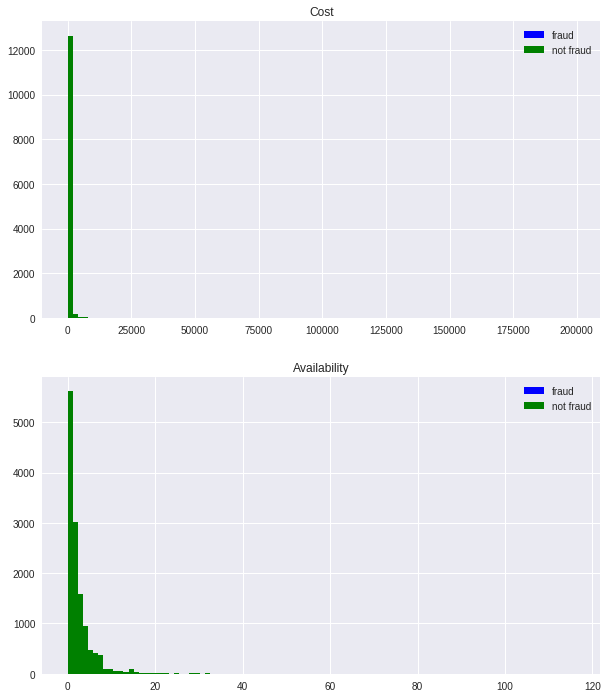

In [139]:
plt.figure(figsize = (10, 12))
plt.subplot(2, 1, 1)
fraud["cost"].hist(bins = 100, color = "b", label = "fraud")
not_fraud["cost"].hist(bins = 100, color = "g", label = "not fraud")
#plt.xlim(0, 5000)
plt.title('Cost')
plt.legend()

plt.subplot(2, 1, 2)
fraud["availability"].hist(bins = 100, color = "b", label = "fraud")
not_fraud["availability"].hist(bins = 100, color = "g", label = "not fraud")
#plt.xlim(df["quantity_total"].min(), df["quantity_total"].max())
plt.title('Availability')
plt.legend()

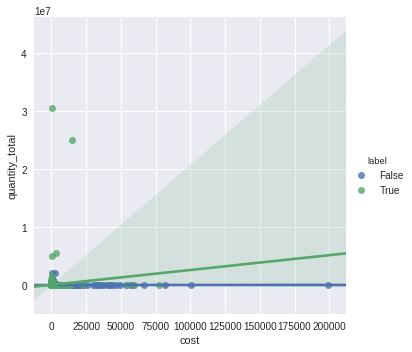

In [150]:
sns.lmplot("cost", "quantity_total", data = df, hue = "label")